In [19]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn') 

In [20]:
def read_ts_api_call(api_call):
    df = pd.read_csv(api_call, encoding="utf8", sep=",")
    df.indice_tiempo = pd.to_datetime(df.indice_tiempo)
    return df.set_index("indice_tiempo").to_period()


## **Ejercicio 1:** 

Buscar la serie del tipo de cambio del Banco Nación (BNA vendedor), generar un índice de tiempo, guardar los datos en CSV e imprimir el valor del 1 de Enero de 2019 en el notebook.

In [21]:
#Importamos los datos del tipo de cambio del Banco Nación en la tabla "tcbna"
tcbna= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26,168.1_T_CAMBIMAE_D_0_0_15&limit=5000&format=csv")
tcbna.head()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_mae
0,2008-06-06,NaN,3.070
1,2008-06-07,NaN,3.070
2,2008-06-08,NaN,3.070
3,2008-06-09,NaN,3.063
4,2008-06-10,NaN,3.065


In [22]:
# Visualizo los tipos que pandas que se infirieron al leer los datos. 
#Analizo los tipos de datos para ver si el campo indice_tiempo está en formato datatime y así utilizarlo como índice de la tabla.
tcbna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 3 columns):
indice_tiempo               4172 non-null object
tipo_cambio_bna_vendedor    1831 non-null float64
tipo_cambio_mae             4146 non-null float64
dtypes: float64(2), object(1)
memory usage: 97.9+ KB


In [23]:
# Como el campo temporal que elegí para índice no está en el formato deseado, lo transformo.
tcbna["indice_tiempo"] = pd.to_datetime(tcbna["indice_tiempo"])
#Corroboro que el campo esté en el formato deseado
tcbna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172 entries, 0 to 4171
Data columns (total 3 columns):
indice_tiempo               4172 non-null datetime64[ns]
tipo_cambio_bna_vendedor    1831 non-null float64
tipo_cambio_mae             4146 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 97.9 KB


In [24]:
#Transformo el campo "indice_tiempo" en el índice de la tabla
tcbna = tcbna.set_index("indice_tiempo")
tcbna.head()

,tipo_cambio_bna_vendedor,tipo_cambio_mae
indice_tiempo,,
2008-06-06,NaN,3.070
2008-06-07,NaN,3.070
2008-06-08,NaN,3.070
2008-06-09,NaN,3.063
2008-06-10,NaN,3.065


In [25]:
tcbna=tcbna[tcbna.index > "2017-12-31"]
tcbna[:6]

,tipo_cambio_bna_vendedor,tipo_cambio_mae
indice_tiempo,,
2018-01-01,18.90,18.649
2018-01-02,18.65,18.410
2018-01-03,18.70,18.445
2018-01-04,18.90,18.630
2018-01-05,19.10,18.903
2018-01-06,19.10,18.903


In [26]:
#Guardo los datos en csv
tcbna.to_csv("./datos/tcbna.csv", encoding="utf8")

In [27]:
#IMprimo el valor del Tipo de Cambio Vendedor según bna al 1-1-2019
print('el tipo de cambio vendedor al 01/01/2019 es de :${}/USD'.format(tcbna.loc["2019-01-01", "tipo_cambio_bna_vendedor"]))
## Acá podría definir una función que tenga como variable la fecha y devuelva el tipo de cambio vendedor

el tipo de cambio vendedor al 01/01/2019 es de :$38.6/USD


## Ejercicio 2

Graficar las variaciones del emae (serie original) como cambio porcentual respecto de 12 meses atrás (variación porcentual interanual) en un gráfico de barras con el mismo color desde 2016 en adelante.

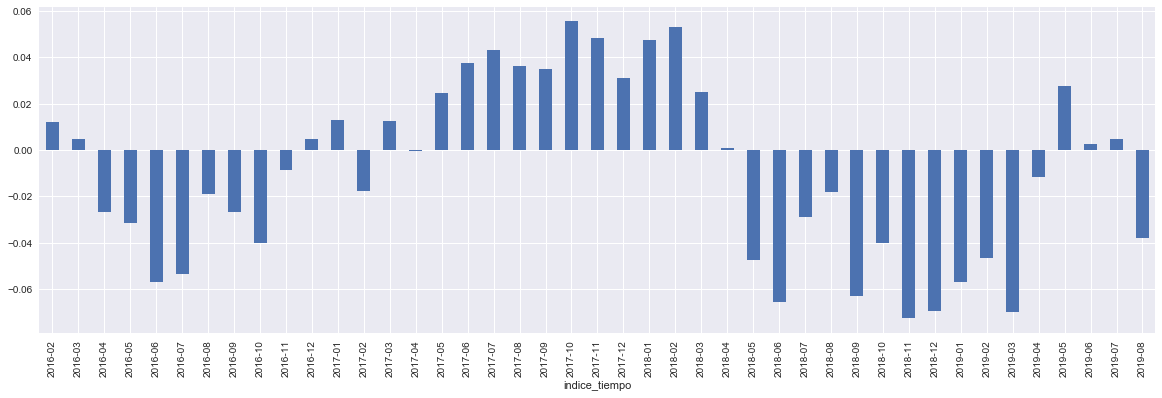

In [28]:
emae = read_ts_api_call("https://apis.datos.gob.ar/series/api/series/?ids=143.3_NO_PR_2004_A_21,143.3_NO_PR_2004_A_31,143.3_NO_PR_2004_A_28&limit=5000&format=csv")
emae_prom_mov= emae.pct_change(12)

emae_prom_mov[emae_prom_mov.index>20160101].indice_serie_original.plot(figsize=(20,6), kind="bar");

## Ejercicio 3

Chequear la correlación entre las variaciones interanuales (12 meses) del EMAE y sus componentes sectoriales.

In [29]:
emae.pct_change(12).corr()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_serie_original,1.000000,0.977298,0.924994
indice_serie_desestacionalizada,0.977298,1.000000,0.967763
indice_serie_tendencia_ciclo,0.924994,0.967763,1.000000


## Ejercicio 4

Crear un simple tablero de seguimiento de variables de coyuntura usando _subplots_ que contenga la 1-evolución del tipo de cambio BNA vendedor (promedio móvil 30 días), 2-la tasa de interés de política monetaria, 3-la inflación interanual mensual, 4-la expectativa de inflación de los próximos 12 meses.

In [104]:
tc_bna_vend= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26&limit=5000&format=csv")
tc_bna_vend["indice_tiempo"]=pd.to_datetime(tc_bna_vend["indice_tiempo"])
tc_bna_vend= tc_bna_vend.set_index("indice_tiempo")
tc_bna_prom_mov=tc_bna_vend.rolling(30).mean()[30:]
tc_bna_prom_mov.head()

,tipo_cambio_bna_vendedor
indice_tiempo,
2014-12-03,8.517333
2014-12-04,8.518667
2014-12-05,8.520000
2014-12-06,8.521333
2014-12-07,8.522667


In [105]:
tasa_interes_pm= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=89.1_IR_BCRARIA_0_M_34&limit=5000&format=csv")
tasa_interes_pm["indice_tiempo"]=pd.to_datetime(tasa_interes_pm["indice_tiempo"])
tasa_interes_pm= tasa_interes_pm.set_index("indice_tiempo")
tasa_interes_pm.head()

,instr_bcra_tasa_politica_monetaria
indice_tiempo,
2016-01-01,31.187525
2016-02-01,30.959416
2016-03-01,37.773141
2016-04-01,38.000800
2016-05-01,36.583467


In [106]:
inflacion_ia= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=103.1_I2N_2016_M_19&representation_mode=percent_change_a_year_ago&limit=5000&format=csv")
inflacion_ia["indice_tiempo"]=pd.to_datetime(inflacion_ia["indice_tiempo"])
inflacion_ia= inflacion_ia.set_index("indice_tiempo")
inflacion_ia.head()

,ipc_2016_nivgeneral_var_pct_ia
indice_tiempo,
2017-04-01,0.275192
2017-05-01,0.239574
2017-06-01,0.219280
2017-07-01,0.215369
2017-08-01,0.230840


In [107]:
exp_inflacion= pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=431.1_EXPECTATIVDIO_M_0_0_30_56&limit=5000&format=csv")
exp_inflacion["indice_tiempo"]=pd.to_datetime(exp_inflacion["indice_tiempo"])
exp_inflacion= exp_inflacion.set_index("indice_tiempo")
exp_inflacion.head()                    

,expectativa_inflacion_promedio
indice_tiempo,
2006-08-01,13.732315
2006-09-01,11.885915
2006-10-01,11.728203
2006-11-01,12.726685
2006-12-01,13.863447


In [108]:
tablero=pd.merge(tc_bna_prom_mov, tasa_interes_pm, left_on="indice_tiempo", right_on="indice_tiempo")
tablero= pd.merge(tablero, inflacion_ia, left_on="indice_tiempo", right_on="indice_tiempo") 
tablero= pd.merge(tablero, exp_inflacion,left_on="indice_tiempo", right_on="indice_tiempo")
tablero.head()

,tipo_cambio_bna_vendedor,instr_bcra_tasa_politica_monetaria,ipc_2016_nivgeneral_var_pct_ia,expectativa_inflacion_promedio
indice_tiempo,,,,
2017-04-01,15.718333,25.666667,0.275192,27.4
2017-05-01,15.550000,26.250000,0.239574,27.9
2017-06-01,15.951000,26.250000,0.219280,27.3
2017-07-01,16.313333,26.250000,0.215369,29.3
2017-08-01,17.424167,26.250000,0.230840,27.9


IndexError: too many indices for array

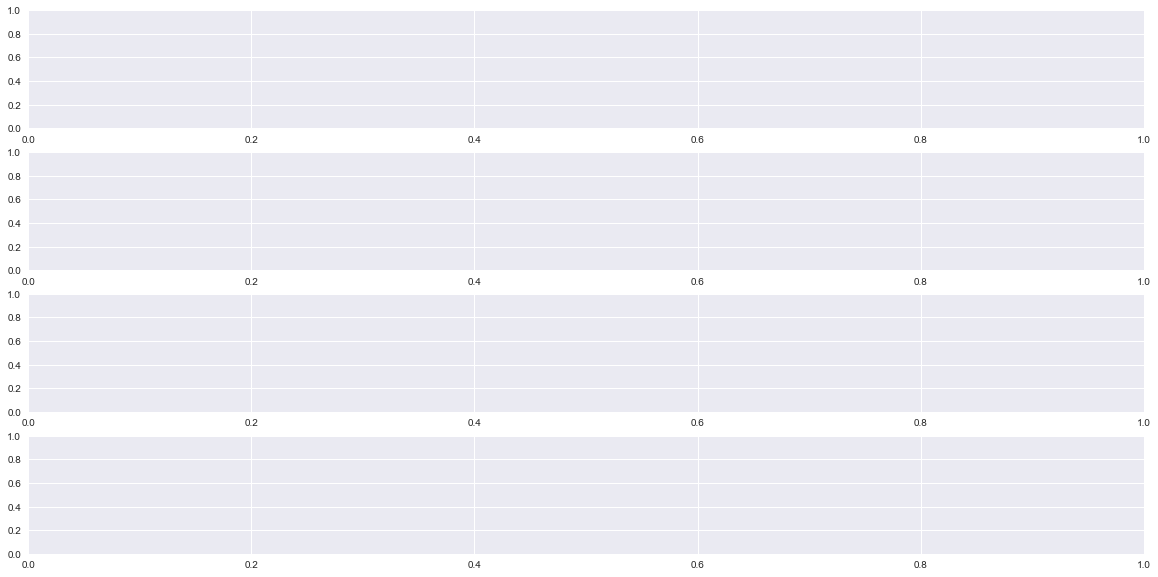

In [109]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))
tablero.plot("tipo_cambio_bna_vendedor",ax=axes[0,0])
tablero.plot("instr_bcra_tasa_politica_monetaria",ax=axes[1,0])
tablero.plot("ipc_2016_nivgeneral_var_pct_ia",ax=axes[2,0])
tablero.plot("expectativa_inflacion_promedio",ax=axes[3,0])
for row in axes:
    for ax in row:
        pass
        ax.set_xlabel("")
        ax.set_ylabel("")
